<a href="https://colab.research.google.com/github/adwaithdr/SignGlove/blob/main/Wine_Quality_Prediction_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/winequality.red.csv')

In [3]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


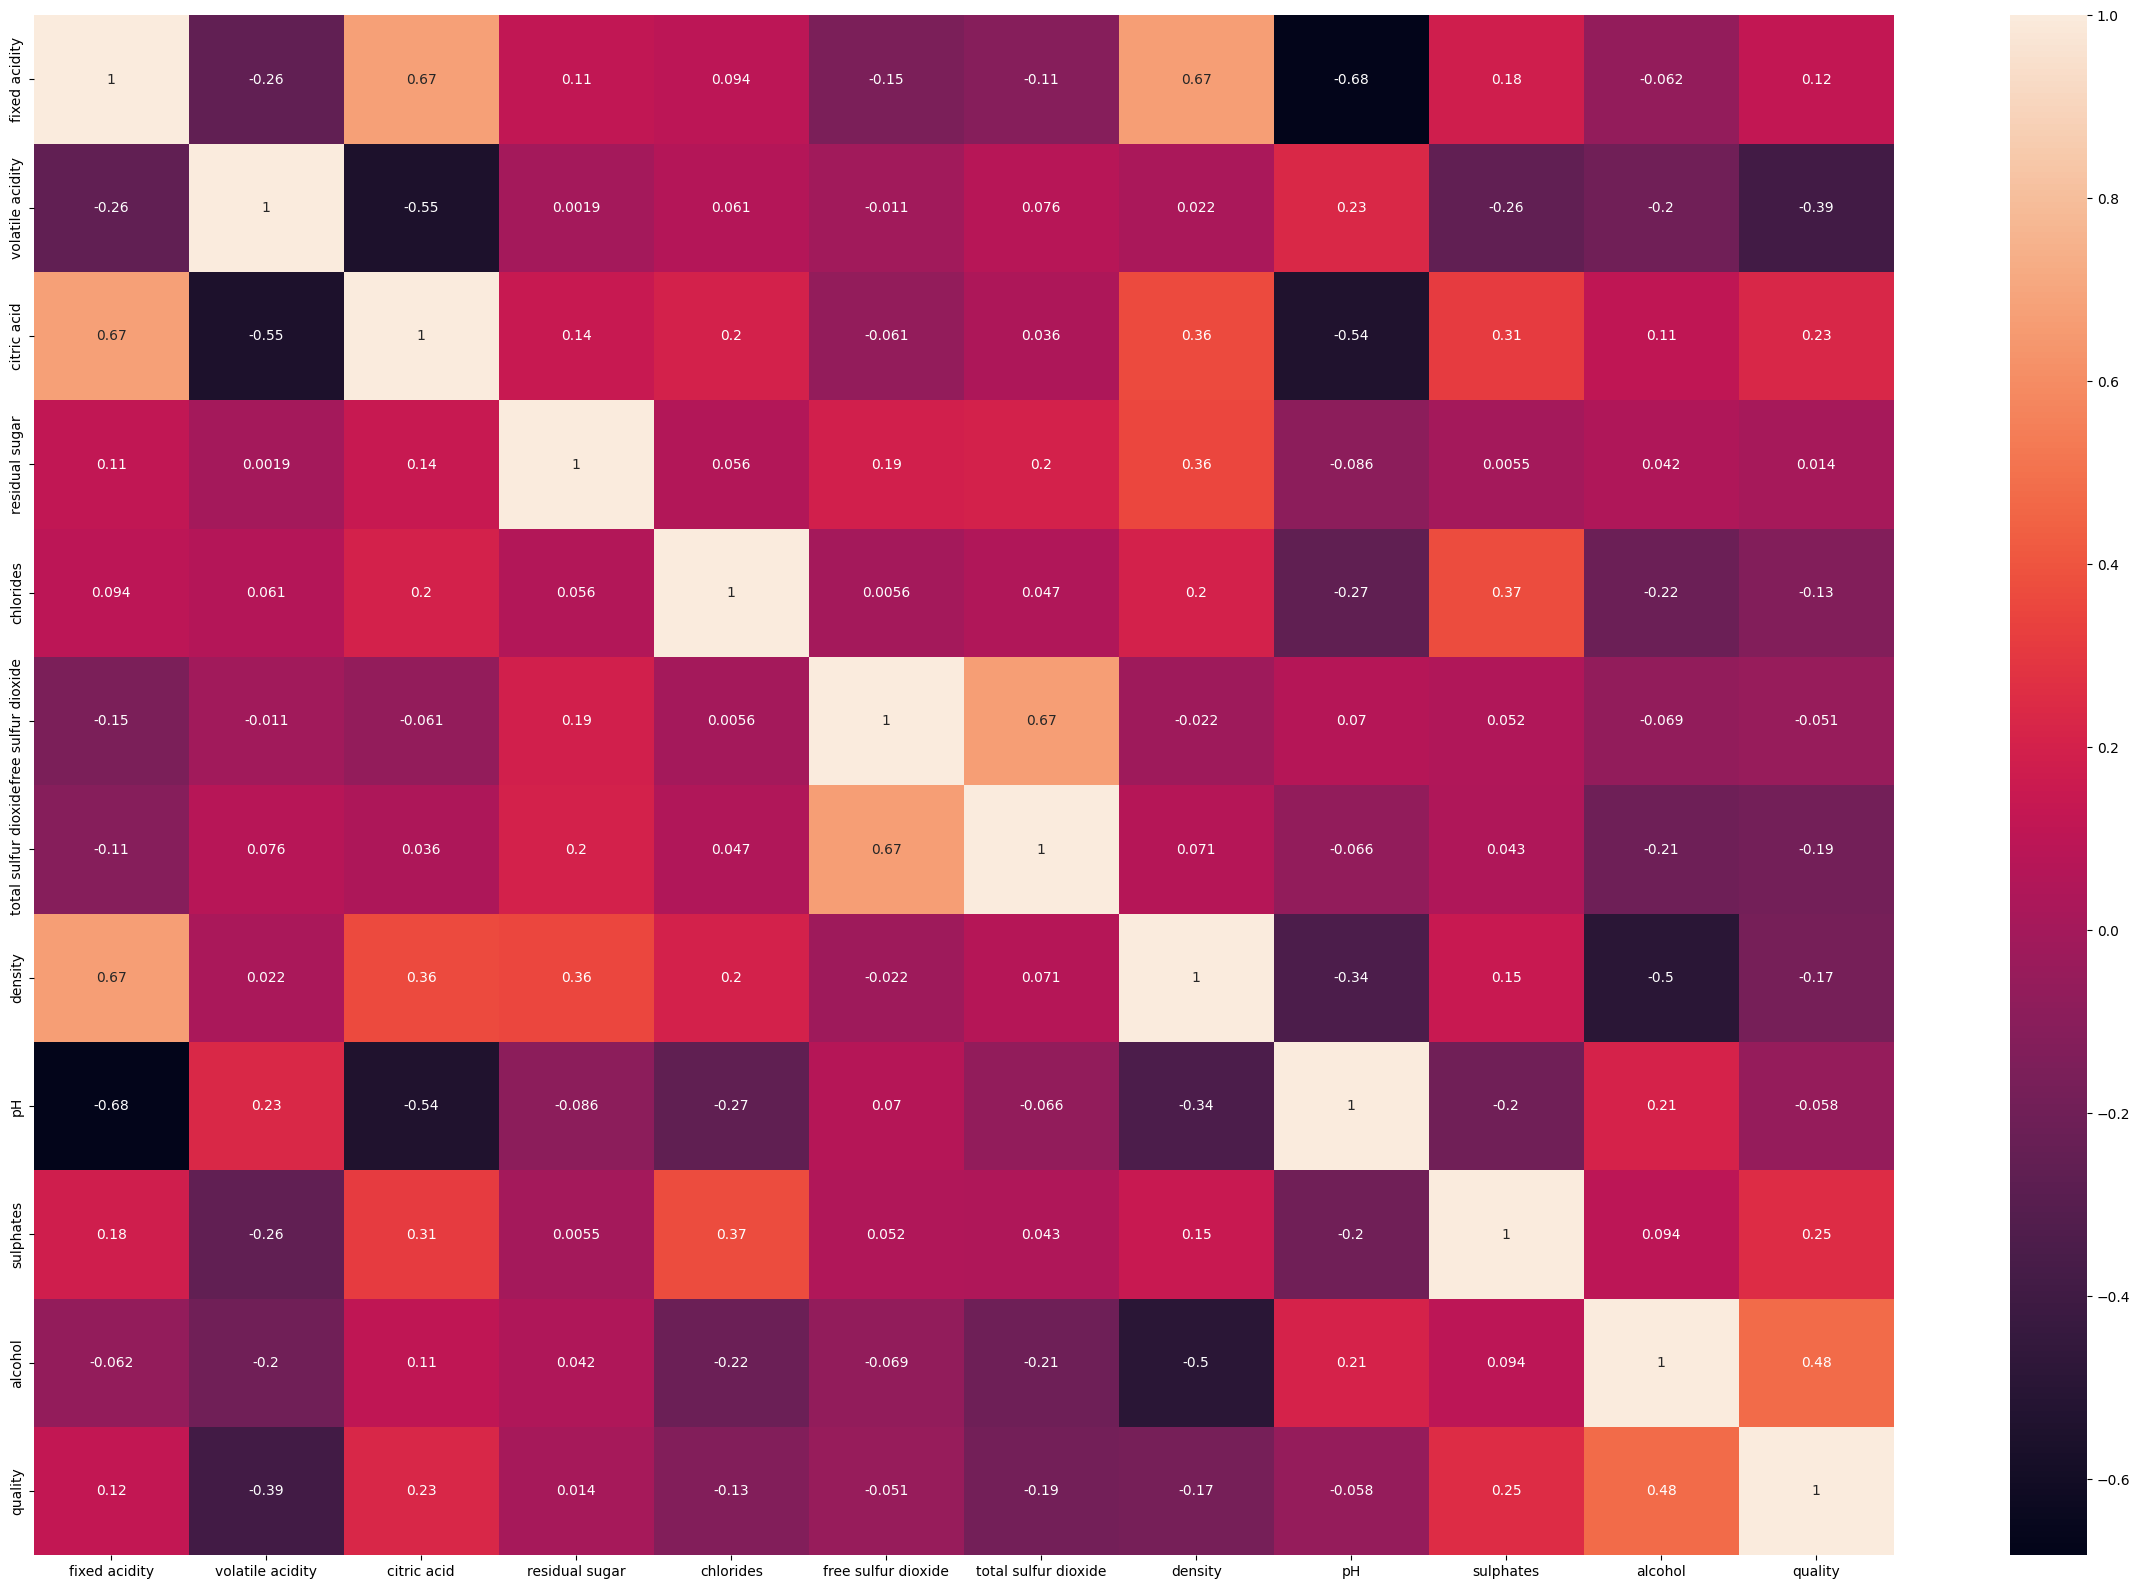

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(30,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()
plt.savefig('Corellationmatrix.png')

In [7]:
from scipy import stats
z=np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [8]:
new_data=data[(z<3).all(axis=1)]

In [9]:
#Data splitting into target feature(X) and target column(y)
from sklearn.model_selection import train_test_split
#X input feature
X=new_data.drop(columns='quality')
#y outcome
y=new_data['quality']

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
#Data modelling using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel=RandomForestClassifier(n_estimators=100)

In [14]:
rf_classificationModel.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
#prediction of data using random forest
y_pred=rf_classificationModel.predict(X_test)

In [16]:
y_pred

array([5, 6, 7, 7, 7, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,
       5, 6, 6, 6, 5, 5, 7, 6, 5, 7, 5, 7, 5, 5, 5, 7, 7, 7, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 7, 5,
       6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 5, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 8, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 7,
       7, 7, 5, 6, 5, 5, 5, 7, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 5, 5, 7, 6,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 6, 6, 7, 7,
       7, 7, 5, 6, 5])

In [17]:
#Data evaluation on metrics
from sklearn import metrics
print('Accuracy Score',metrics.accuracy_score(y_test,y_pred))

Accuracy Score 0.7079037800687286


[Text(0.6914184876253133, 0.9772727272727273, 'x[6] <= 91.5\ngini = 0.636\nsamples = 722\nvalue = [38, 513, 453, 140, 16]'),
 Text(0.4317091557017544, 0.9318181818181818, 'x[10] <= 9.95\ngini = 0.647\nsamples = 650\nvalue = [38, 411, 443, 138, 16]'),
 Text(0.22423245614035087, 0.8863636363636364, 'x[3] <= 4.35\ngini = 0.512\nsamples = 252\nvalue = [20, 255, 127, 7, 0]'),
 Text(0.16525689223057644, 0.8409090909090909, 'x[1] <= 0.572\ngini = 0.498\nsamples = 248\nvalue = [15, 254, 123, 7, 0]'),
 Text(0.106203007518797, 0.7954545454545454, 'x[6] <= 67.0\ngini = 0.542\nsamples = 114\nvalue = [3, 98, 85, 6, 0]'),
 Text(0.07706766917293233, 0.75, 'x[3] <= 2.95\ngini = 0.535\nsamples = 92\nvalue = [0, 69, 78, 6, 0]'),
 Text(0.07205513784461152, 0.7045454545454546, 'x[9] <= 0.465\ngini = 0.538\nsamples = 90\nvalue = [0, 69, 71, 6, 0]'),
 Text(0.06704260651629072, 0.6590909090909091, 'gini = 0.0\nsamples = 3\nvalue = [0, 5, 0, 0, 0]'),
 Text(0.07706766917293233, 0.6590909090909091, 'x[4] <= 0.0

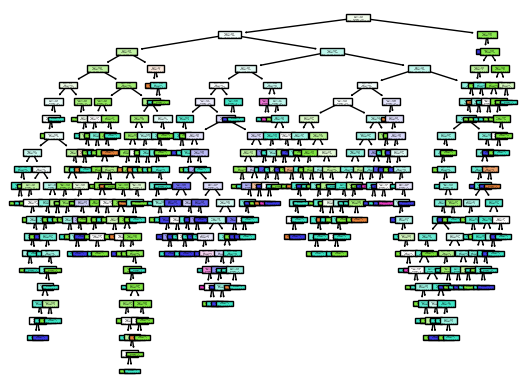

In [18]:
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0],filled=True)

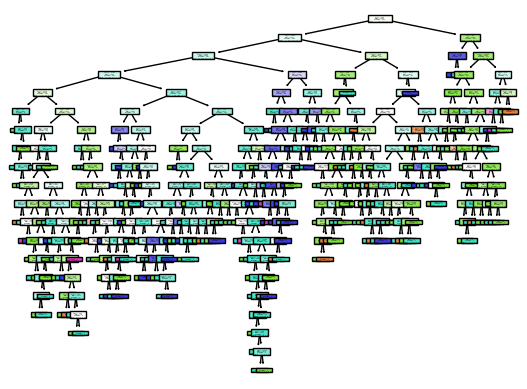

In [19]:
for i in range(len(rf_classificationModel.estimators_)):
     tree.plot_tree(rf_classificationModel.estimators_[i],filled=True)